### New York Air Quality Measurements
Daily air quality measurements in New York, May to September 1973.

A data frame with 153 observations on 6 variables.

[,1]	Ozone	numeric	Ozone (ppb) <br>
[,2]	Solar.R	numeric	Solar R (lang) <br>
[,3]	Wind	numeric	Wind (mph) <br>
[,4]	Temp	numeric	Temperature (degrees F) <br>
[,5]	Month	numeric	Month (1--12) <br>
[,6]	Day	numeric	Day of month (1--31) <br>

#### Details
Daily readings of the following air quality values for May 1, 1973 (a Tuesday) to September 30, 1973.

- Ozone: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island 
- Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park
- Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
- Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

Source
The data were obtained from the New York State Department of Conservation (ozone data) and the National Weather Service (meteorological data).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("./dataset/airquality2.csv")

In [4]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,42.099099,184.801802,9.939640,77.792793,7.216216,15.945946
std,33.275969,91.152302,3.557713,9.529969,1.473434,8.707194
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,9.000000
50%,31.000000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,62.000000,255.500000,11.500000,84.500000,9.000000,22.500000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [5]:
df_filtered=df[df.Ozone < np.percentile(df.Ozone,98)]
print(df_filtered.Ozone.describe())

count    108.000000
mean      39.333333
std       29.019813
min        1.000000
25%       17.500000
50%       30.000000
75%       59.000000
max      118.000000
Name: Ozone, dtype: float64


In [6]:
df_filtered.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,39.333333,182.879630,10.109259,77.601852,7.203704,16.083333
std,29.019813,91.647202,3.454715,9.576002,1.489899,8.620910
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,17.500000,108.750000,7.400000,71.000000,6.000000,9.000000
50%,30.000000,202.000000,9.700000,78.500000,7.000000,16.500000
75%,59.000000,254.500000,11.625000,84.250000,9.000000,22.250000
max,118.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [8]:
#Generacion Modelo separando 90% train 10% test
train, test = train_test_split(df_filtered, test_size=0.1, random_state=1, shuffle=True)
Xtrain = train[['Solar.R','Wind','Temp']]
ytrain = train["Ozone"]

Xtest = test[['Solar.R','Wind','Temp']]
ytest = test["Ozone"]

### 1. Regresion Lineal

In [9]:
model = linear_model.LinearRegression()
model = model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)

print('Intercepto =', model.intercept_)
print('Coeficiente  =', model.coef_)
print('R2 Sobre TRAIN =', model.score(Xtrain, ytrain))
print('R2 Sobre TEST =', model.score(Xtest, ytest))
print ("MSE en Dataset de TEST : %.2f" % mean_squared_error(ytest, predictions))

Intercepto = -78.95339643224308
Coeficiente  = [ 0.04350829 -2.34113708  1.73097077]
R2 Sobre TRAIN = 0.6357538363007713
R2 Sobre TEST = 0.7225781178362185
MSE en Dataset de TEST : 114.77


### 2. Decision Tree Regressor

In [11]:
#Defino el algoritmo a utilizar
adr = DecisionTreeRegressor(max_depth = 5)

#Entreno el modelo
adr.fit(Xtrain, ytrain)

#Realizo una predicción
Y_pred = adr.predict(Xtest)

print('ARBOL R2  TRAIN =', adr.score(Xtrain, ytrain))
print('ARBOL R2  TEST =', adr.score(Xtest, ytest))
print ("MSE en Dataset de TEST : %.2f" % mean_squared_error(ytest, Y_pred))

ARBOL R2  TRAIN = 0.9283403201177542
ARBOL R2  TEST = 0.7744183662139295
MSE en Dataset de TEST : 93.32


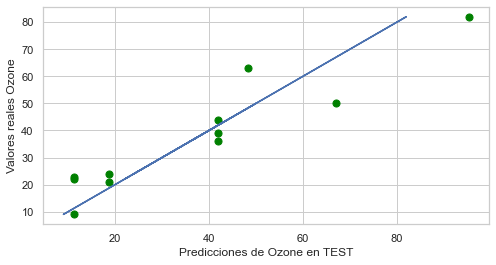

C:\Users\roype\anaconda3\envs\PR LAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


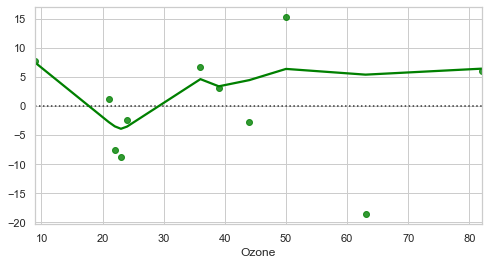

In [24]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(ytest, ytest, '-')
plt.scatter(Y_pred, ytest, s=50, c='green', marker='o')
plt.xlabel("Predicciones de Ozone en TEST")
plt.ylabel("Valores reales Ozone")
plt.show()


sns.set(style="whitegrid")
sns.residplot(ytest, Y_pred, lowess=True, color="green")
plt.show()


### 3. Random Forrest

In [44]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()

#Entreno el modelo
reg.fit(Xtrain, ytrain)

#Realizo una predicción
y_pred = reg.predict(Xtest)

print('Random Forrest R2  TRAIN =', reg.score(Xtrain, ytrain))
print('Random Forrest R2  TEST =', reg.score(Xtest, ytest))
print ("MSE en Dataset de TEST : %.2f" % metrics.mean_squared_error(ytest, y_pred))

Random Forrest R2  TRAIN = 0.9570219973908595
Random Forrest R2  TEST = 0.7637369291621718
MSE en Dataset de TEST : 97.74


### 4. XGBoost

In [32]:
from xgboost import XGBRegressor

In [36]:
#Create a XGBoost Regressor
XGBreg = XGBRegressor()

# Train the model using the training sets 
XGBreg.fit(Xtrain, ytrain)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
# Model prediction on train data
y_pred_xgb = XGBreg.predict(Xtest)

print('XGBoost R2  TRAIN =', XGBreg.score(Xtrain, ytrain))
print('XGBoost R2  TEST =', XGBreg.score(Xtest, ytest))
print ("MSE en Dataset de TEST : %.2f" % mean_squared_error(ytest, y_pred_xgb))

XGBoost R2  TRAIN = 0.9999999617839477
XGBoost R2  TEST = 0.4883108148084998
MSE en Dataset de TEST : 211.69


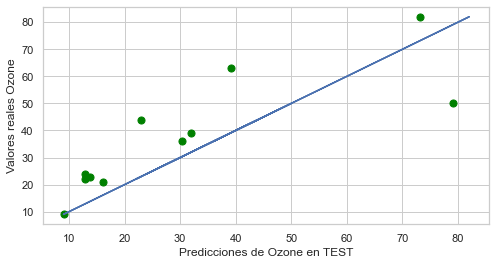

C:\Users\roype\anaconda3\envs\PR LAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


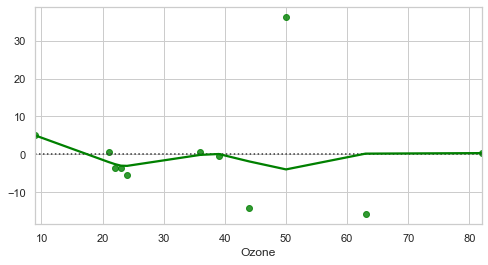

In [48]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(ytest, ytest, '-')
plt.scatter(y_pred_xgb, ytest, s=50, c='green', marker='o')
plt.xlabel("Predicciones de Ozone en TEST")
plt.ylabel("Valores reales Ozone")
plt.show()


sns.set(style="whitegrid")
sns.residplot(ytest, y_pred_xgb, lowess=True, color="green")
plt.show()
